<center><h1>Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα <br>  <br> 
    Πρώτη Σειρά Aσκήσεων	
</h1></center>

<br>



   ### Διαχωρισμός ασθενών με νόσο Parkinson
   Αρχικά θα διαβάσουμε τα δεδομένα που αντιστοιχούν στην ομάδα B17 όπου ανήκουμε. Το μικρό dataset είναι το **S2** και περιέχει δεδομένα από βιοϊατρικά φωνητικά σήματα από 31 ανθρώπους εκ των οποίων οι 23 έχουν την νόσο Parkinson. Σκοπός είναι να διακριθούν οι υγιείς από τους ανθρώπους που πάσχουν από τη νόσο. 

   Αρχικά θα διαβάσουμε/ανεβάσουμε το αρχείο με τα δεδομένα και στη συνέχεια θα το εισάγουμε στο περιβάλλον ως "StringIO object".

In [125]:

from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_1a61d8e4b9784ac4b9ae5c6303ca5849(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_7766c6a00034dbf507b1f21d69eaf2b65b06a5ae','domain': {'id': '96c8e9860dc740b281dacc613be9e1ab'},
            'password': 'wQpop!A1o1-Eobz^'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

# Your data file was loaded into a StringIO object and you can process the data.
# Please read the documentation of pandas to learn more about your possibilities to load your data.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html
data_1 = get_object_storage_file_with_credentials_1a61d8e4b9784ac4b9ae5c6303ca5849('exercise1', 'parkinsons.data')

data= pd.read_csv(data_1)

   Στον πίνακα data έχουμε αποθηκεύσει τα δεδομένα του αρχείου. Η πρώτη γραμμή περιέχει τα ονόματα των στηλών και γιαυτό θα την αφήσουμε ως header. Στο αρχείο υπάρχουν 24 στήλες και 195 γραμμές. Συνεπώς υπάρχουν περίπου 6 γραμμές με δεδομένα για κάθε ασθενή. Κάθε στήλη περιέχει συγκεκριμένα φωνητικά χαρακτηριστικά για κάθε ασθενή, όπως μέση, μέγιστη, ελάχιστη φωνητική συχνότητα κ.α. καθώς και ένα status στο οποίο το 0 δηλώνει ότι το άτομα πάσχει από PD ενώ το 1 το αντίθετο. **Στην άσκηση αυτή θέλουμε να διακρίνουμε υγιείς από ασθενείς.** Τα δεδομένα δίνονται έτσι ακριβώς οπότε δεν απαιτείται κάποια ιδιαίτερη επεξεργασια- μετατροπή.
   
   Αφου διαβάσαμε τα δεδομένα θα κατασκευάσουμε έναν πίνακα με το πεδίο status και έναν δέυτερο με τα υπολοίπα δεδομένα εκτός την στήλης αυτής. Επίσης στον δεύτερο πίνακα δεν μας ενδιαφέρουν τα id των ανθρώπων που συμετείχαν και γιαυτό δεν τα κρατάμε.

In [126]:
# Από τα αρχικά δεδομένα κρατάμε μονο το status στον πίνακα label
labels_df = data.iloc[:, [17]]
# Και στον πίνακα features όλες τις υπόλοιπες έκτος των ονομάτων και του status
features_df = data.drop(['name','status'], 1)

# Μετασχηματίζουμε τα παραπάνω δεδομένα σε np arrays
# Εισάγουμε την numpy 
import numpy as np
features = features_df.values
# Τον πίνακα label τον αποθηκέυω με την μέθοδο flatten για να έχει μέγεθος (195,) και όχι (195,1)
labels = labels_df.values.flatten()
print labels

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


In [127]:
# Εκτυπώνουμε την συχνότητα εμφάνισης υγειών και μη- υγειών ατόμων για να δούμε
# κατά πόσο τα δεδομένα μας είναι ισσοροπημένα ή όχι
frequencies= np.bincount(labels) 
print "Frequencies:", frequencies, " Healthy/Not-Healty Ratio: ", 1.0*frequencies[1]/frequencies[0]

Frequencies: [ 48 147]  Healthy/Not-Healty Ratio:  3.0625


Τα δείγματα που έχουμε **δεν** είναι ισσοροπημένα μιας και έχουν λόγο **3** δηλαδή είναι περίπου 3πλάσια τα υγειή άτομα που πήραν μέρος στις μετρήσεις μας  

Ορίζουμε μια συνάρτήση που θα μας εμφανίζει τα γραφήματα η οποία χρειάζεται παρακάτω.

In [128]:
import matplotlib.pyplot as plt; plt.rcdefaults()
def graph_bar(statistics, x_labels):
    # data to plot
    n_groups = len(x_labels)
    # create plot
    #fig, 
    ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8
    F1_weighted= statistics[0::2]
    F1_macro= statistics[1::2]

    rects1 = plt.bar(index, F1_weighted, bar_width,
                     alpha=opacity,
                     color='b',
                     label='F1 Weighted')

    rects2 = plt.bar(index + bar_width, F1_macro, bar_width,
                     alpha=opacity,
                     color='g',
                     label='F1 Macro')

    plt.xlabel('Classifier')
    plt.ylabel('Scores')
    plt.title('Scores by classifier')
    plt.xticks(index + bar_width, x_labels)
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

In [155]:
def graph_bar_with_prev(statistics,statistics_prev, x_labels):
    # data to plot
    n_groups = len(x_labels)

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.20
    opacity = 0.8

    F1_weighted= statistics[0::2]
    F1_macro= statistics[1::2]
    F1_weighted_pr= statistics_prev[0::2]
    F1_macro_pr= statistics_prev[1::2]
    
    rects1 = plt.bar(index, F1_weighted_pr, bar_width,
                     alpha=opacity,
                     color='r',
                     label='Previous F1 Weighted')

    rects2 = plt.bar(index + bar_width, F1_macro_pr, bar_width,
                     alpha=opacity,
                     color='m',
                     label='Previous F1 Macro')
    
    rects3 = plt.bar(index + 2*bar_width, F1_weighted, bar_width,
                     alpha=opacity,
                     color='b',
                     label='F1 Weighted')
    
    rects4 = plt.bar(index + 3*bar_width, F1_macro, bar_width,
                     alpha=opacity,
                     color='g',
                     label='F1 Macro')
    
    plt.xlabel('Classifier')
    plt.ylabel('Scores')
    plt.title('Scores by classifier')
    plt.xticks(index + bar_width, x_labels)
    plt.legend(loc='best')
    plt.figure(1, figsize=(9, 3))

    plt.tight_layout()
    plt.show()

Στην συνέχεια θα χωρίσουμε τα αρχικά δεδομένα σε 2 κατηγορίες. Η πρώτη αποτελεί τα δεδομένα με τα οποία θα κάνουμε train τους Classifier, και αποτελόυν το 80% των αρχικών δεδομένων, και τα δείγματα που θα κάνουμε στην συνέχεια test. Παράλληλα κρατάμε και το αποτέλεσμα που εξετάζουμε δηλαδή αν το άτομο αυτό πάσχει ή όχι από την νόσο PD. Το αποτέλεσμα αυτό βρίσκεται όπως γνωρίζουμε στον πίνακα label. 

In [160]:
from sklearn.model_selection import train_test_split

# Χωρίζουμε τα δεδομένα μας σε train kai test με βάση το ποσοστό που θέλουμε
# Σε αυτήν την ασκήση θέλουμε το Train να είναι το 20% των αρχικών δεδομένων
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.2)

# Εμφανίζουμε πάλι την συχνότητα και τον λόγο των δειγμάτων με τα οποία κάνουμε εκπαίδευση τον Dummy Classifier
test_frequencies= np.bincount(test_labels)
print "Test frequencies:", test_frequencies, "Healthy/Not-Healty Ratio: ", test_frequencies[1]/test_frequencies[0]

Test frequencies: [ 6 33] Healthy/Not-Healty Ratio:  5


<center><h3> Dummy Classifier </h3></center> <br>
Θα δοκιμάσουμε τις βασικές απλές τακτικές ταξινόμησης. Η κλάση DummyClassifier δέχεται μια παράμετρο που καθορίζει την τακτική της ταξινόμησης ως εξής:
* “uniform”: προβλέπει τυχαία και ομοιόμορφα.
* “constant”: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης. Όταν του δώσουμε την τιμή 1 τότε το αποτέλεσμα τις πρόβλεψης είναι πάντα 1 και αν του δώσουμε 0 θα είναι 0 αντίστοιχα.
* “most_frequent”: προβλέπει πάντα την πιο συχνή κατηγορία στο training set.
* “stratified”: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set.

Παρακάτω κατασκευάζουμε έναν Classifier για κάθε μια από τις παραπάνω κατηγορίες. 

Συγκεκριμένα θα υλοποιήσουμε μια συναρτηση την dummies_score η οποία θα κατασκευάζει και θα εκπαιδεύει κάθε έναν από αυτούς τους Classifiers με τα δείγματα του πίνακα train. Για να εξετάσουμε τα αποτελέσματα αυτών θα χρησιμοποιήσουμε τα δεδομένα του πίνακα test. 

Για να μπορέσουμε να αξιολογήσουμε τα αποτελέσματα των ταξινομητών αρκεί να συκρίνουμε τα αποτελέσματα τους με το status που ξέρουμε για κάθε άτομο. Το μέτρο αυτό ονομάζεται πιστότητα (accuracy) και μπορούμε εύκολα να το υπολογίσουμε. Πρακτικά ελεγχούμε το αποτέλεσμα κάθε ταξινομητή με το πραγματικό status και αν αυτά είναι ίσα αυξάνουμε έναν μετρήτη. Τέλος η πιστότητα υπολογίζεται διαιρώντας αυτον τον μετρητή με τον συνολικό αρθμό των δειγμάτων. Ουσιαστικά η τιμή αυτή είναι ο αριθμός των όμοιων δειγμάτων πρός τα συνολικά δείγματα του dataset. 

Στην πραγματικότητα δεν θα κάνουμε την παραπάνω διαδικασία χειροκίνητα αλλά θα χρησιμοποιήσουμε την έτοιμη συνάρτηση που περιέχεται στην βιβλιοθήκη sklearn.metrics. 

Τέλος αξίζει να σημειώθει οτι για να οργανώσουμε καλύτερα τα δεδομένα μας, θα αποθηκεύσουμε τα αποτελέσματα του accuracy για κάθε έναν από τους ταξινομητές μας σε ένα λεξικό και στην συνέχεια για την καλύτερη σύγκριση των αποτελεσμάτων θα εμφανίζουμε το accuracy των Classifier από το **μεγαλύτερο στο μικρότερο**.

Παράλληλα θα υπολογίσουμε και τις μετρικές που ζητούνται δηλαδή τα F1_weighted και F1_macro καθώς και τον πίνακα σύγχυσης. Για περισσότερη ευκολία κατασκευάζουμε μια συνάρτηση report ή οποία μας επιστρέφει τα αποτελέσματα των παραπάνω μετρικών καθώς και μια συναρτήση η οποία κατασκευάζει τις παραπάνω κατηγορίες Dummy Classification και επιστρέφει τις μετρiκές του κάνοντας χρήση της συνάρτησης report.

In [161]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

def report(test_labels, preds, label):
    print classification_report(test_labels, preds, target_names = ['0','1'])
    print "Confusion matrix for {}:".format(label)
    print "[[0  1]]"
    print confusion_matrix(test_labels, preds), "\n"
    (w1,w2,w3,w4) = precision_recall_fscore_support(test_labels, preds, average='weighted')
    print "F1 weighted average: %f \n" % w3
    (m1,m2,m3,m4) = precision_recall_fscore_support(test_labels, preds, average='macro')
    print "F1 macro average: %f \n" % m3
    return (w3,m3);

In [165]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

def dummies_score(test, train, test_labels, train_labels):
    dc_uniform = DummyClassifier(strategy="uniform")
    dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
    dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
    dc_most_frequent = DummyClassifier(strategy="most_frequent")
    dc_stratified = DummyClassifier(strategy="stratified")
    # Αρχικοποιούμε ένα κένο λεξικό
    accuracy= {}

    # με τη μέθοδο fit "εκπαιδεύουμε" κάθε έναν από τους ταξινομητές στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
    # Κανουμε την εκπαίδευση για κάθε ταξινομητή και τα αποτελέσματα αυτών τα βάζουμε μάζι με ένα όνομα στο dictionary που κατασκευάσαμε 
    # Εκπαίδευση uniform ταξινομητή
    model = dc_uniform.fit(train, train_labels)
    # Βάζουμε το ποσοσοστό της πιστότητας στο λεξικό
    accuracy['uniform (random)'] = dc_uniform.score(test, test_labels)
    predicts = dc_uniform.predict(test)
    (uw, um) = report(test_labels,predicts,'Uniform')
    
    # Εκπαίδευση constant ταξινομητή με constant = 0
    model = dc_constant_0.fit(train, train_labels)
    accuracy['constant: 0'] = dc_constant_0.score(test, test_labels)
    predicts = dc_constant_0.predict(test)
    (c0w, c0m) = report(test_labels,predicts,'Constant 0')
    
    # Εκπαίδευση constant ταξινομητή με constant = 1
    model = dc_constant_1.fit(train, train_labels)
    accuracy['constant: 1'] = dc_constant_1.score(test, test_labels)
    predicts = dc_constant_1.predict(test)
    (c1w, c1m) = report(test_labels,predicts,'Constant 1')
    
    # Εκπαίδευση most-frequent ταξινομητή 
    model = dc_most_frequent.fit(train, train_labels)
    accuracy['dc_most_frequent'] = dc_most_frequent.score(test, test_labels)
    predicts = dc_most_frequent.predict(test)
    (mfw, mfm) = report(test_labels,predicts,'Most frequent')
    
    # Εκπαίδευση stratified ταξινομητή 
    model = dc_stratified.fit(train, train_labels)
    accuracy['stratified'] = dc_stratified.score(test, test_labels)
    predicts = dc_stratified.predict(test)
    (sw, sm) = report(test_labels,predicts,'Stratified')
    print "Classification Accuracy on Parkinson Data with 20% test set:"
    
    for key, value in sorted(accuracy.iteritems(), key=lambda (k,v): (-v,k)):
        print "%s: %s" % (key, value)
    return [uw, um, c0w, c0m, c1w, c1m, mfw, mfm, sw, sm];

Ορίζουμε επίσης μια συναρτήση η οποία κατασκευάζει ένα MLP με τις Default παραμέτρους για να μπορούμε να αξιολογήσουμε σε πρώτη φάση την προεπεξεργασία που κάνουμε στα δεδομένα.

In [163]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Κατασκευάζουμε ένα MLP με τις defualt τιμές παραμάτρων
def default_MLP(test, train, test_labels, train_labels):
    clf = MLPClassifier()
    clf.fit(train, train_labels)
    preds = clf.predict(test)
    (F1_weighted,F1_macro) = report(test_labels, preds, 'MLP Default')
    return [F1_weighted,F1_macro]

Κατασκευάζουμε και τα 2 ειδών Classificator και εκτυπώνουμε τα αποτελεσμάτα- τις μετρικές τους καθώς και έναν πίνακα για να μπορούμε να οπτικοποιήσουμε τα αποτελέσματα αυτά.

             precision    recall  f1-score   support

          0       0.14      0.50      0.21         6
          1       0.82      0.42      0.56        33

avg / total       0.72      0.44      0.51        39

Confusion matrix for Uniform:
[[0  1]]
[[ 3  3]
 [19 14]] 

F1 weighted average: 0.506813 

F1 macro average: 0.387143 

             precision    recall  f1-score   support

          0       0.15      1.00      0.27         6
          1       0.00      0.00      0.00        33

avg / total       0.02      0.15      0.04        39

Confusion matrix for Constant 0:
[[0  1]]
[[ 6  0]
 [33  0]] 

F1 weighted average: 0.041026 

F1 macro average: 0.133333 

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.85      1.00      0.92        33

avg / total       0.72      0.85      0.78        39

Confusion matrix for Constant 1:
[[0  1]]
[[ 0  6]
 [ 0 33]] 

F1 weighted average: 0.775641 

F1 macro averag

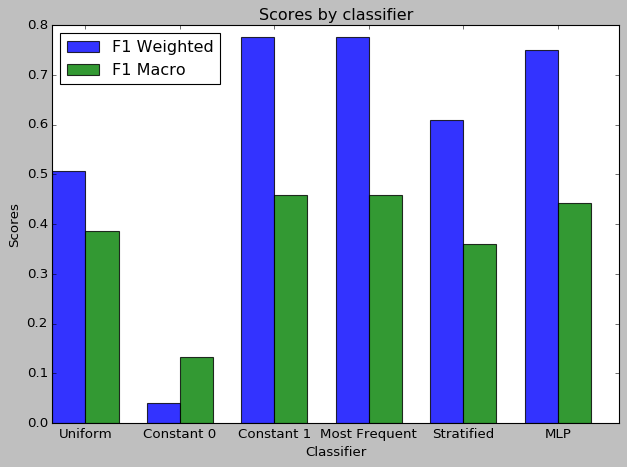

In [166]:
dummies_report= dummies_score(test, train, test_labels, train_labels)
MLP_report = default_MLP(test, train, test_labels, train_labels)
reports= dummies_report + MLP_report
x_labels= ['Uniform','Constant 0', 'Constant 1', 'Most Frequent', 'Stratified','MLP']
graph_bar(reports, x_labels)

In [138]:
test_frequencies= np.bincount(test_labels)
print "Test frequencies:", test_frequencies

Test frequencies: [ 9 30]


**Συμπερασμάτα:**

Το αποτελέσμα των Dummies Classificator διαφέρει κατά πολύ σε διαφορετικά δείγματα. Αρχικά η τεχνική uniform κάνει μια ομοιόμορφη εκτίμηση, έκανε 6 σωστές πρρόβλεψείς μη-ασθενών ατόμων και 12 σωστές για ασθενείς καταφέρνοντας ποσοστό επιτύχιας 48% (περίπου στην μέση). Οι costant τώρα είναι ακόμη πιο απλοί στην λειτουργία τους. Συγκεκριμένα δέχονται παρά μόνο ένα αποτέλεσμα κάθε φορά (ή 0 ή 1  αναλόγα με το τι ορίζουμε εμείς κάθε φορά) και γι'αυτό στον πίνακα σύγχυσης για παράδειγμα ο constant=0 βγάζει 10 στα 10 σωστά αποτελέσματα στο ο ανθρωπός να μην είναι ασθενής και 29 λάθος στο να είναι. Οι αριθμοί αυτοί ταυτίζονται με αυτούς που τυπώσαμε για την συχνότητα εμφάνησης 0 και 1 στα δεδομένα test. Το ποσοστό επιτυχία; του constant=0 είναι αρκετά μικρό μιας και έχουμε πολύ λιγότερα δείγματα με label 0 στο train set. Αντίθετα ο contsant=1 πετυχαίνει αρκετά υψηλά ποσόστα για τον ίδιο ακριβώς λόγο. Επίσης στον confusion matrix του βλέπουμε ότι δεν έχει καταφέρει να βρει κανένα υγειή άτομο και έχει βρει όλους τους ασθενείς. Αυτό συμβαίνει γιατί το αποτέλεσμά του είναι συνεχώς 1. Τέλος,ο stratified κάνει προβλέψεις διατηρώντας την κατανομή των labels που δέχεται στο training set και βλέπουμε οτι είχε αρκετά υψηλή επιτυχία, περίπου 62%. Συγκεκριμένα είχε 25 πραγματικούς ασθενείς και 1 άτομο που δεν έπασχε. Επίσης έκανε 9 λανθασμένες προβλέψεις μη-ασθενών ανθρώπων και 4 λανθασμένες προβλέψεις ασθενών. Τέλος ο MLP δεν σημείωσε πολύ διαφορετικά αποτελέσματα από  τους υπόλοιπους μιας και κατάφερε να έχει F1_weighted= 63.4%. Επίσης στο διάγραμμα μπορούμε να οπτικοποιήσουμε τα αποτελέσματά μας. Ο MLP όπως καταλαβαίνουμε είναι πολύ καλύτερος από τους dummies πράγμα το οποίο όμως δεν φάνηκε στην συγκεκριμένη εκτέλεση. Αυτό συνέβη για 2 λόγους. Αρχικά το  test set ,όπως και όλα τα δεδομένα μας, είναι ανομοιόμορφα δηλαδή έχουν πολύ μεγαλύτερο ποσοστό υγειών από ασθενών ατόμων. Αυτό κάνει τον dummy με constant=1 να έχει αρκετά υψηλά αποτελέσματα επικαλύπτοντας τον MLP πράγμα που προφανώς δεν ισχύει πάντοτε. Επίσης αυτό δημιουργεί και ένα δεύτερο πρόβλημα που είναι οτι και το Trainning set είναι ανομοιόμορφο και ο MLP δεν εκπαιδεύεται σωστά. Για αυτό στα επόμενα βήματα είναι να κάνουμε  ένα  Preprocessing στα δεδομένα μας για να επιτύχουμε καλύτερη εκπαίδευση των ταξινομητών.

<center><h3>Κάνουμε Preprocessing στα δεδομένα μας</h3></center> <br>

Παρακάτω, από τα αρχικά δεδομένα train και test που έχουμε κάνει ήδη split θα κατασκευάσουμε με διάφορες τεχνικές άλλα, με σκοπό να βελτιστοποιήσουμε  τους ταξινομητές μας.

Η πρώτη τεχνική προεπεξεργασίας είναι να μειώσουμε τα χαρακτηριστικά μας με βάση το ελάχιστο κατώφλι διακύμανσης

(39, 16)
Ta xarakthristika meiwthikan kata:  6
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.68      0.39      0.50        33

avg / total       0.58      0.33      0.42        39

Confusion matrix for Uniform:
[[0  1]]
[[ 0  6]
 [20 13]] 

F1 weighted average: 0.423077 

F1 macro average: 0.250000 

             precision    recall  f1-score   support

          0       0.15      1.00      0.27         6
          1       0.00      0.00      0.00        33

avg / total       0.02      0.15      0.04        39

Confusion matrix for Constant 0:
[[0  1]]
[[ 6  0]
 [33  0]] 

F1 weighted average: 0.041026 

F1 macro average: 0.133333 

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.85      1.00      0.92        33

avg / total       0.72      0.85      0.78        39

Confusion matrix for Constant 1:
[[0  1]]
[[ 0  6]
 [ 0 33]] 



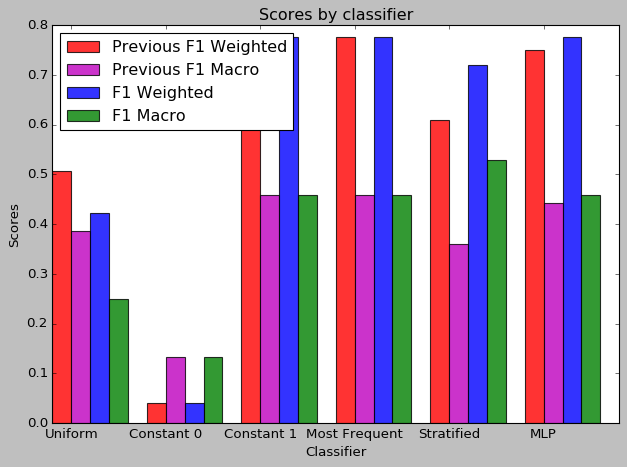

In [167]:
from sklearn.feature_selection import VarianceThreshold

# αρχικοποιούμε έναν selector
selector = VarianceThreshold(threshold=0.0001)
train_reduced = selector.fit_transform(train)
mask = selector.get_support()
test_reduced = test[:,mask]

print test_reduced.shape
#dummies(test_reduced, train_reduced, test_labels, train_labels)
#dummies(test, train, test_labels, train_labels)

print "Ta xarakthristika meiwthikan kata: ", (len(test[0])- len(test_reduced[0]))

dummies_report= dummies_score(test_reduced, train_reduced, test_labels, train_labels)
MLP_report = default_MLP(test_reduced, train_reduced, test_labels, train_labels)
reports_thr= dummies_report + MLP_report
x_labels= ['Uniform','Constant 0', 'Constant 1', 'Most Frequent', 'Stratified','MLP']
graph_bar_with_prev(reports_thr,reports, x_labels)

Όπως βλέπουμε από τα παραπάνω χρησιμοποιήσαμε ένα πολύ μικρί κατώφλι 0.0001 το οποίο έδιωξε 5 παραμέτρους οι οποίοι δεν πρόσφεραν κάτι σημαντικό. Βλέπουμε ήδη πως τα αποτελέσματα του MLP έχουν βελτιωθεί.

Θα εφαρμόσουμε κανονικοποίηση με **standardization** στο (διορθωμένο και με επιλογή χαρακτηριστικών) dataset μας:

             precision    recall  f1-score   support

          0       0.09      0.33      0.14         6
          1       0.76      0.39      0.52        33

avg / total       0.66      0.38      0.46        39

Confusion matrix for Uniform:
[[0  1]]
[[ 2  4]
 [20 13]] 

F1 weighted average: 0.461978 

F1 macro average: 0.331429 

             precision    recall  f1-score   support

          0       0.15      1.00      0.27         6
          1       0.00      0.00      0.00        33

avg / total       0.02      0.15      0.04        39

Confusion matrix for Constant 0:
[[0  1]]
[[ 6  0]
 [33  0]] 

F1 weighted average: 0.041026 

F1 macro average: 0.133333 

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.85      1.00      0.92        33

avg / total       0.72      0.85      0.78        39

Confusion matrix for Constant 1:
[[0  1]]
[[ 0  6]
 [ 0 33]] 

F1 weighted average: 0.775641 

F1 macro averag

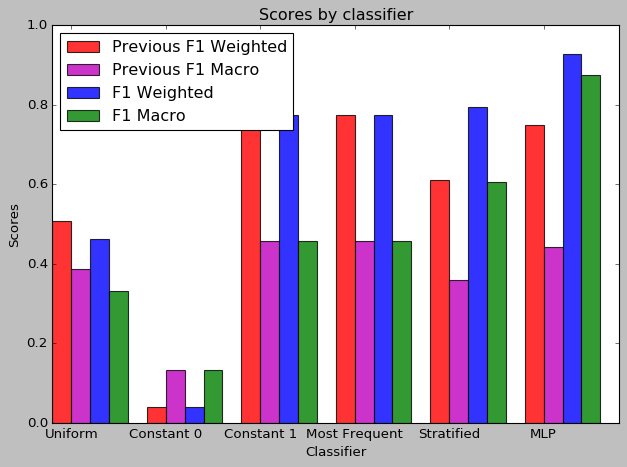

In [168]:
from scipy import stats as st
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(train_reduced)
train_scaled = scaler.transform(train_reduced)
test_scaled = scaler.transform(test_reduced)

dummies_report= dummies_score(test_scaled, train_scaled, test_labels, train_labels)
MLP_report = default_MLP(test_scaled, train_scaled, test_labels, train_labels)
reports_std= dummies_report + MLP_report
x_labels= ['Uniform','Constant 0', 'Constant 1', 'Most Frequent', 'Stratified','MLP']
graph_bar_with_prev(reports_std,reports, x_labels)

Από τα παραπάνω γραφήματα βλέπουμε ότι η έξοδος του MLP με τις default παραμέτρους έχει βελτιωθεί σημαντικά. Συγκεκριμένα αρχικά τα αποτελέμστα έχουν αυξηθεί κάτα 20% μέχρι τώρα μόνο με την προεπεξεργασία που έχουμε κάνει στα δεδομένα.

όπως είδαμε παραπάνω τα δείγματα μας δεν είναι ισορροπήμενα, δηλαδή δεν έχουμε τον ίδιο αριθμό υγειών και μη ατόμων. έτσι η επόμενη τεχνική προεπεξεργασίας που θα χρησιμοποιήσουμε είναι να προσπαθήσουμε να ισορροπήσουμε τα δειγματά μας με την μέθοδο του oversampling, η οποία γενικά προσφέρει καλύτερα αποτελέσματα έναντι της undersampling.

Train Data=  (156, 16)
Resampled Data=  (228, 16)
Test frequencies: [114 114] Healthy/Not-Healty Ratio-Resampled:  1
[ 6 33]
             precision    recall  f1-score   support

          0       0.24      0.83      0.37         6
          1       0.94      0.52      0.67        33

avg / total       0.84      0.56      0.62        39

Confusion matrix for Uniform:
[[0  1]]
[[ 5  1]
 [16 17]] 

F1 weighted average: 0.621083 

F1 macro average: 0.518519 

             precision    recall  f1-score   support

          0       0.15      1.00      0.27         6
          1       0.00      0.00      0.00        33

avg / total       0.02      0.15      0.04        39

Confusion matrix for Constant 0:
[[0  1]]
[[ 6  0]
 [33  0]] 

F1 weighted average: 0.041026 

F1 macro average: 0.133333 

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.85      1.00      0.92        33

avg / total       0.72      0.85      0

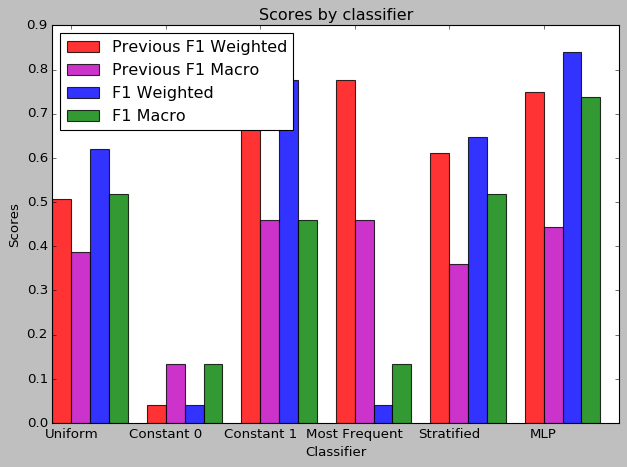

In [169]:
#!pip install --upgrade imbalanced-learn

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer

# αρχικοποίηση του RandomOverSampler
ros = RandomOverSampler(random_state=0)#seed used by the random number generator
#mlb = MultiLabelBinarizer().fit(['0','1'])
train_resampled, train_labels_resampled = ros.fit_sample(train_scaled,train_labels)
print "Train Data= ",train_scaled.shape
print "Resampled Data= ", train_resampled.shape

# Εμφανίζουμε πάλι την συχνότητα και τον λόγο των δειγμάτων με τα οποία κάνουμε εκπαίδευση των Dummy Classifier
train_r_frequencies= np.bincount(train_labels_resampled) 
print "Test frequencies:", train_r_frequencies, "Healthy/Not-Healty Ratio-Resampled: ", train_r_frequencies[1]/train_r_frequencies[0]

print np.bincount(test_labels) 

dummies_report= dummies_score(test_scaled, train_resampled, test_labels, train_labels_resampled)
MLP_report = default_MLP(test_scaled, train_resampled, test_labels, train_labels_resampled)
reports_over= dummies_report + MLP_report
x_labels= ['Uniform','Constant 0', 'Constant 1', 'Most Frequent', 'Stratified','MLP']
graph_bar_with_prev(reports_over,reports , x_labels)

Στην συνέχεια θα προσπαθήσουμε να μειώσουμε την διαστατικότητα με εξαγωγή χαρακτηριστικών. 

Μπορούμε να επιτύχουμε μείωση της διαστατικότητας με 2 τρόπους : ο ένας με την επιλογή μεταβλήτων, δηλαδή χρησιμοποιώντας ένα υποσύνολο των αρχικών μεταβλητών (όπως κάναμε προηγουμένως) και ο δεύτερος με την εξαγωγή νέων χαρακτηριστικών σε έναν χώρο μικρότερων διαστάσεων. Η τεχνική που θα εφαρμόσουμε εδώ για την εξαγωγή χαρακτηριστικών είναι η τεχνική PCA.

[ 0.49792911  0.6706434   0.7621469   0.81509379  0.86076243  0.90279218
  0.93039435  0.95489719  0.97128559  0.98448477  0.9930369   0.99646859
  0.99825786  0.99934315  0.99994765  1.        ]


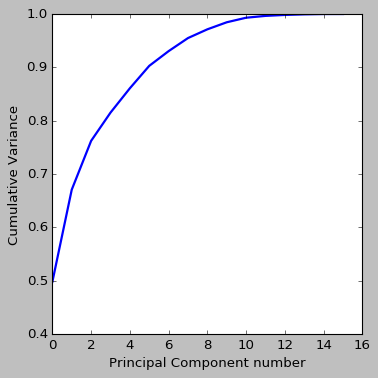

(228, 16)
(228, 16)

(39, 16)
(39, 16)


In [170]:
from sklearn.decomposition import PCA

pca = PCA()

# Εφαρμόζουμε στα δεδομένα εκπαίδευσης και ελέγχου τον *ΙΔΙΟ* μετασχηματισμό
# Οι κύριες συνιστώσες υπολογίζονται στο train set
# Στα train κάνουμε fit_transform στο test μόνο transform:
trainPCA = pca.fit_transform(train_resampled)
testPCA = pca.transform(test_scaled)

evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print cum_evar
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

print train_resampled.shape
print trainPCA.shape
print ""
print test_scaled.shape
print testPCA.shape

Από τον παραπάνω πίνακα βλέπουμε ότι με μόνο 9 από τις μεταβλητές έχουμε το 97% της διακύμσνσης και συνεπώς της αρχικής πληροφορίας.

             precision    recall  f1-score   support

          0       0.19      0.50      0.27         6
          1       0.87      0.61      0.71        33

avg / total       0.76      0.59      0.65        39

Confusion matrix for Uniform:
[[0  1]]
[[ 3  3]
 [13 20]] 

F1 weighted average: 0.646354 

F1 macro average: 0.493506 

             precision    recall  f1-score   support

          0       0.15      1.00      0.27         6
          1       0.00      0.00      0.00        33

avg / total       0.02      0.15      0.04        39

Confusion matrix for Constant 0:
[[0  1]]
[[ 6  0]
 [33  0]] 

F1 weighted average: 0.041026 

F1 macro average: 0.133333 

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.85      1.00      0.92        33

avg / total       0.72      0.85      0.78        39

Confusion matrix for Constant 1:
[[0  1]]
[[ 0  6]
 [ 0 33]] 

F1 weighted average: 0.775641 

F1 macro averag

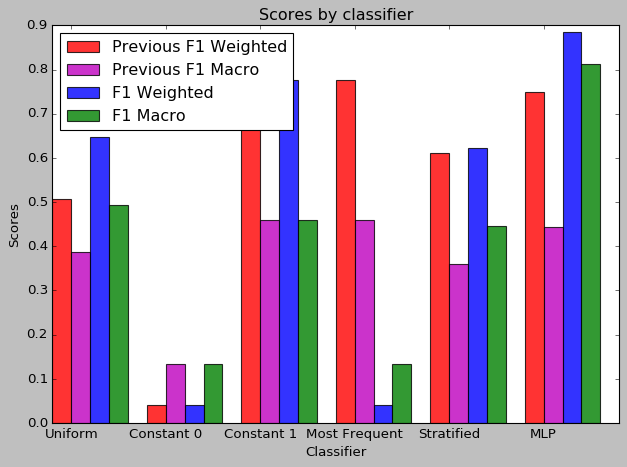

In [171]:
pca = PCA(n_components=9)
#trainPCA = pca.fit_transform(train_reduced)
#testPCA = pca.transform(test_scaled)
train_PCA = pca.fit_transform(train_resampled)
test_PCA = pca.transform(test_scaled)

dummies_report= dummies_score(test_PCA, train_PCA, test_labels, train_labels_resampled)
MLP_report = default_MLP(test_PCA, train_PCA, test_labels, train_labels_resampled)
reports_PCA= dummies_report + MLP_report
x_labels= ['Uniform','Constant 0', 'Constant 1', 'Most Frequent', 'Stratified','MLP']
graph_bar_with_prev(reports_PCA,reports, x_labels)

Όσο αναφορά τους Dummies βλέπουμε οτι τα αποτελέσματα του uniform αυξήθηκαν αρκετά , του constant 0 και 1 όπως ήταν λογικό εμειναν ίδια ένω του stratified μειώθηκαν με την προεπεξεργασία που κάναμε στα δεδομένα μας. 

Τελικά με την τεχνική αυτή παρατηρούμε μεγαλύτερα σκόρ στον MLP. Γιαυτό την κρατάμε. Αξίζει να σηειωθεί οτι δοκιμάστηκαν αρκετές διαφορετικές διατάξεις των βημάτων προεπεξεργασίας. Δηλαδή αλλάξαμε την σειρά τους, διώξαμε μερικές, αλλάξαμε τις παραμέτρους τους και τελικά καταλήξαμε στην παραπάνω σειρά με τις παραπάνω υπερπαραμέτρους.

Αρχικά θα συγκρίνουμε για τους Classificators με τις default παραμέτους τα αποτελέσματα που θα έχουν για τα αρχικά δεδομένα και στην συνέχεια για τα δεδομένα που έχουμε κάνει Preprossecing.

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.83      0.91      0.87        33

avg / total       0.71      0.77      0.74        39

Confusion matrix for MLP Default:
[[0  1]]
[[ 0  6]
 [ 3 30]] 

F1 weighted average: 0.735786 

F1 macro average: 0.434783 

             precision    recall  f1-score   support

          0       0.55      1.00      0.71         6
          1       1.00      0.85      0.92        33

avg / total       0.93      0.87      0.89        39

Confusion matrix for MLP Default:
[[0  1]]
[[ 6  0]
 [ 5 28]] 

F1 weighted average: 0.885394 

F1 macro average: 0.811958 



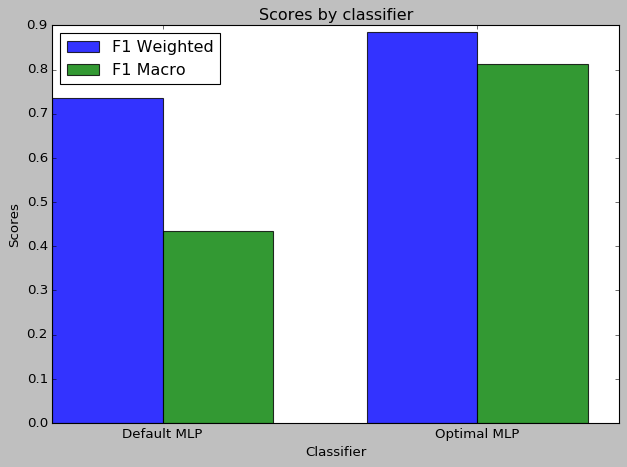

In [172]:
statistics_def= default_MLP(test,train,test_labels, train_labels)
statistics_opt= default_MLP(test_PCA,train_PCA,test_labels, train_labels_resampled)
x_labels= ['Default MLP', 'Optimal MLP']
statistics= statistics_def + statistics_opt
graph_bar(statistics, x_labels)

Από το παραπάνω γράφημα βλέπουμε ξεκάθαρη αύξηση της επίτυχιας του MLP με το αρχικό και με το τελικό data set. Όπως παρατηρούμε η επιτυχία του MLP (με default παραμέτρους) έχει αυξηθεί κατά σχεδόν 30%, πράγμα που την καθιστά μια πολύ καλή βελτιστοποίηση του σήματος είσόδου.

<center><h2>Βελτιστοποίηση MLP</h2></center><br>

Στο σημείο αυτό θέλουμε να κάνουμε βελτιστοποίηση των υπερπαραμέτρων του MLP έτσι ώστε να έχουμε όσο το δυνατόν πιο υψηλά αποτελέσματα. Για αυτήν την άσκηση δεν θα χρησιμοποιήσουμε την τεχνική του grid search αλλά θα κάνουμε με δοκιμές την ίδια δουλειά. Συνεπώς θα κάνουμε για κάθε υπερπαράμετρο ένα cross validation με σκοπό να βρούμε κάθε φορά μια βέλτιστη τιμή και στη συνέχεια με την τιμή αυτή θα συνεχίζουμε για την επόμενη.

Αρχικά ορίζουμε 2 συναρτήσεις οι οποίες θα μας βρίσκουν και θα μας οπτικοποιούν τα βέλτιστα αποτελέσματα τόσο για συνεχείς (find_min_scores) όσο και για διακριτά δεδομένα (find_min_bar). Οι συναρτήσεις αυτές είναι πολύ χρήσιμες για να είναι κατανοητές οι τεχνικές που ακολουθούμε.

Αξίζει να σημειωθεί οτι επειδή οι διαφορές από βήμα σε βήμα είναι μικρές, δεν θα κάνουμε bar plot σε κάθε βήμα γιατί δεν μπορούμε να δούμε ξεκάθαρες αλλαγές αλλά θα κάνουμε μόνο ένα τελικό γράφημα για να συγκρίνουμε τα τελικά αποτελέσματα με τα αρχικά.

In [173]:
def find_min_score(cv_scores, possible_optimals):
    # το σφάλμα είναι το αντίστροφο της πιστότητας
    MSE = [1 - x for x in cv_scores]
    # plot misclassification error vs k
    plt.plot(possible_optimals, MSE)
    plt.xlabel('Test Parameter')
    plt.ylabel('Misclassification Error')
    plt.show()

    # determining best k
    possible_optimals = possible_optimals[MSE.index(min(MSE))]
    print ("The optimal layers of MLP (calculated in the training set) is %d with MSE: %1.3f" % (possible_optimals,min(MSE)))
    return possible_optimals

In [174]:
def find_min_bar(cv_scores,possible_optimals, parameter):
    MSE = [1 - x for x in cv_scores]

    y_possition = np.arange(len(possible_optimals))
    plt.bar(y_possition, MSE, align='center', alpha=0.5)
    plt.xticks(y_possition, possible_optimals)     
    plt.xlabel('Test parameter')
    plt.ylabel('Misclassification Error')
    plt.show()
        
    # determining best k
    optimal = possible_optimals[MSE.index(min(MSE))]
    print "The optimal %s is: {}".format(optimal) %parameter
    return optimal;

Στη συνέχεια ορίζουμε συναρτήσεις οι οποίες θα κάνουν Cross validation στον MLP για τις διάφορες υπερπαραμέτρους. Οι συναρτήσεις μπορεί να μην φαίνονται πολύ χρήσιμες τώρα αλλά ήταν πραγματικά, διοτί με αυτές μπορούσαμε εύκολα να αλλάζουμε τόσο την σειρά που θα κάνουμε cross validation όσο και τις τιμές των υπερπαραμέτρων ώστε να καταλήξουμε στις πραγματικά βέλτιστες τιμές του MLP.

In [175]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def cross_validation_layer (train, train_labels, sol):
    # Θα υλοποιήσουμε ένα cross validation με σκοπό να βρούμε το βέλτιστο αριθμό layers στο παραπάνω MPL 
    possible_layers= list(range(1,50,5))
    
    cv_scores_macro = []
    cv_scores_weighted = []
    for k in possible_layers:
        clf = MLPClassifier(hidden_layer_sizes=(k,),solver= sol, random_state=1)
        scores1 = cross_val_score(clf, train, train_labels, cv=10, scoring= 'f1_macro')
        cv_scores_macro.append(scores1.mean())# Βάζω το απότέλεσμα στο τέλος της λίστας που είχα αρχικοποιήσει
        
        scores2 = cross_val_score(clf, train, train_labels, cv=10, scoring= 'f1_weighted')
        cv_scores_weighted.append(scores2.mean())
        
    optimal= find_min_score(cv_scores_macro, possible_layers)
    optimal= find_min_score(cv_scores_weighted, possible_layers)
    return optimal

def cross_validation_activation (train, train_labels, optimal_layers, sol):
    activation= ['identity', 'logistic', 'tanh', 'relu']
    cv_scores_macro = []
    cv_scores_weighted= []
    for k in activation:
        clf = MLPClassifier(activation= k,hidden_layer_sizes=(optimal_layers,),solver= sol, random_state=1)
        scores1 = cross_val_score(clf, train, train_labels, cv=10, scoring='f1_macro')
        cv_scores_macro.append(scores1.mean())# Βάζω το απότέλεσμα στο τέλος της λίστας που είχα αρχικοποιήσει
        
        scores2 = cross_val_score(clf, train, train_labels, cv=10, scoring='f1_weighted')
        cv_scores_weighted.append(scores2.mean())# Βάζω το απότέλεσμα στο τέλος της λίστας που είχα αρχικοποιήσει
    optimal= find_min_bar(cv_scores_macro, activation,'activation')
    optimal= find_min_bar(cv_scores_weighted, activation,'activation')
    return optimal
  

def cross_validation_solver (train, train_labels, optimal_layers, opt_activation):
    solver = ['lbfgs', 'sgd', 'adam']
    cv_scores_macro = []
    cv_scores_weighted = []
    for k in solver:
        clf = MLPClassifier(activation= opt_activation, solver= k,hidden_layer_sizes=(optimal_layers,), random_state=1)
        scores1 = cross_val_score(clf, train, train_labels, cv=10, scoring='f1_macro')
        cv_scores_macro.append(scores1.mean())# Βάζω το απότέλεσμα στο τέλος της λίστας που είχα αρχικοποιήσει
        
        scores2 = cross_val_score(clf, train, train_labels, cv=10, scoring='f1_weighted')
        cv_scores_weighted.append(scores2.mean())# Βάζω το απότέλεσμα στο τέλος της λίστας που είχα αρχικοποιήσει
        
    optimal= find_min_bar(cv_scores_macro, solver,'Solver')
    optimal= find_min_bar(cv_scores_weighted, solver,'Solver')
    return optimal

def cross_validation_max_iter (train, train_labels, optimal_layers, opt_activation, opt_solver):
    max_iter = range(1,351,50)
    cv_scores_macro = []
    cv_scores_weighted = []
    for k in max_iter:
        clf = MLPClassifier(activation= opt_activation, max_iter= k, solver= opt_solver, 
                            hidden_layer_sizes=(optimal_layers,), random_state=1)
        scores1 = cross_val_score(clf, train, train_labels, cv=10, scoring='f1_macro')
        cv_scores_macro.append(scores1.mean())# Βάζω το απότέλεσμα στο τέλος της λίστας που είχα αρχικοποιήσει
        
        scores2 = cross_val_score(clf, train, train_labels, cv=10, scoring='f1_weighted')
        cv_scores_weighted.append(scores2.mean())# Βάζω το απότέλεσμα στο τέλος της λίστας που είχα αρχικοποιήσει
        
    optimal= find_min_bar(cv_scores_macro, max_iter,'max_iter')
    optimal= find_min_bar(cv_scores_weighted, max_iter,'max_iter')
    return optimal

def cross_validation_learning_rate (train, train_labels, optimal_layers, opt_activation, opt_solver, opt_max_iter):
    learning_rate= ['constant', 'invscaling', 'adaptive']
    cv_scores_macro = []
    cv_scores_weighted = []
    for k in learning_rate:
        clf = MLPClassifier(activation= opt_activation, max_iter= opt_max_iter,learning_rate= k, solver= opt_solver, 
                            hidden_layer_sizes=(optimal_layers,), random_state=1)
        scores1 = cross_val_score(clf, train, train_labels, cv=10, scoring='f1_macro')
        cv_scores_macro.append(scores1.mean())# Βάζω το απότέλεσμα στο τέλος της λίστας που είχα αρχικοποιήσει
        
        scores2 = cross_val_score(clf, train, train_labels, cv=10, scoring='f1_weighted')
        cv_scores_weighted.append(scores2.mean())# Βάζω το απότέλεσμα στο τέλος της λίστας που είχα αρχικοποιήσει
        
    optimal= find_min_bar(cv_scores_macro, learning_rate,'Learning Rate')
    optimal= find_min_bar(cv_scores_weighted, learning_rate,'Learning Rate')
    return optimal

def cross_validation_alpha (train, train_labels, optimal_layers, opt_activation, opt_solver, opt_max_iter, opt_l_r):
    alpha = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]
    cv_scores_macro = []
    cv_scores_weighted = []
    for k in alpha:
        clf = MLPClassifier(alpha= k, activation= opt_activation, max_iter= opt_max_iter,learning_rate= opt_l_r, solver= opt_solver, 
                            hidden_layer_sizes=(optimal_layers,), random_state=1)
        scores1 = cross_val_score(clf, train, train_labels, cv=10, scoring='f1_macro')
        cv_scores_macro.append(scores1.mean())# Βάζω το απότέλεσμα στο τέλος της λίστας που είχα αρχικοποιήσει
        
        scores2 = cross_val_score(clf, train, train_labels, cv=10, scoring='f1_weighted')
        cv_scores_weighted.append(scores2.mean())# Βάζω το απότέλεσμα στο τέλος της λίστας που είχα αρχικοποιήσει
        
    optimal= find_min_bar(cv_scores_macro, alpha,'alpha')
    optimal= find_min_bar(cv_scores_weighted, alpha,'alpha')
    return optimal

Από το documantation του MLPClassification βλέπουμε ότι ο default solver είναι ο adam όποτε το βέλτιστο επίπεδο θα το βρούμε για αυτό τον solver. Όποτε για λόγους πληρότητας θα κάνουμε cross validation και με αυτόν τον solver. Επίσης γνωρίζουμε οτι ο solver= 'lbfgs' έχει αρκετά μικρά αποτελέσματα για μικρά dataset, και στην πραγματικοτήτα για τα δεδομένα μας ίσως έχει καλύτερα αποτελέσματα. 

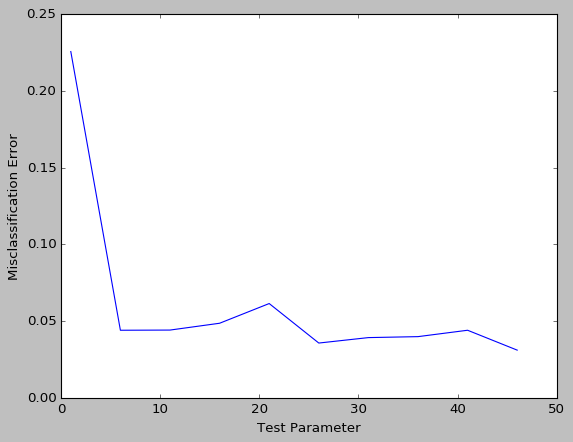

The optimal layers of MLP (calculated in the training set) is 46 with MSE: 0.031


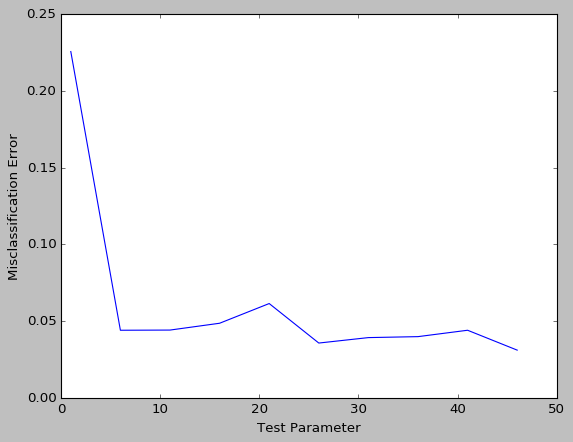

The optimal layers of MLP (calculated in the training set) is 46 with MSE: 0.031
Took for opt layers with lbfgs solver: 16.5681591034 sec


In [176]:
import time
time1 = time.time()
opt_layer_lbfgs= cross_validation_layer(train_PCA, train_labels_resampled,'lbfgs')
print("Took for opt layers with lbfgs solver: %s sec" % (time.time() - time1))

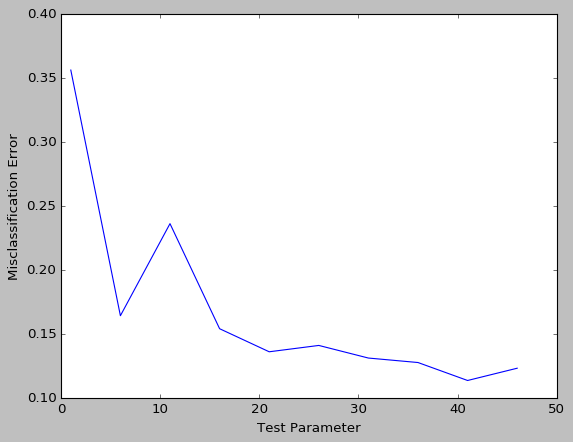

The optimal layers of MLP (calculated in the training set) is 41 with MSE: 0.114


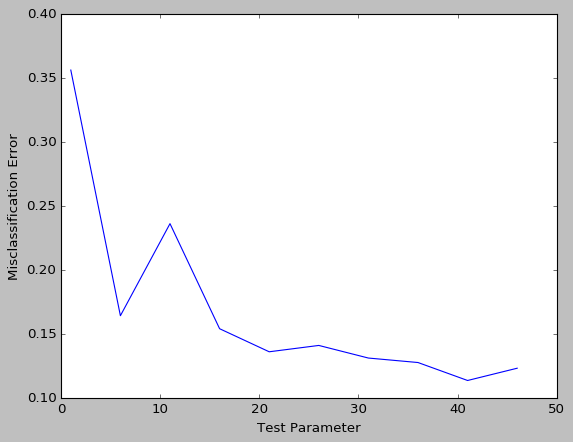

The optimal layers of MLP (calculated in the training set) is 41 with MSE: 0.114
Took for opyt layer with adam solver: 33.1782259941 sec


In [177]:
import time
time1 = time.time()
opt_layer_adam= cross_validation_layer(train_PCA, train_labels_resampled,'adam')
print("Took for opt layer with adam solver: %s sec" % (time.time() - time1))

In [179]:
clf = MLPClassifier(hidden_layer_sizes=(opt_layer_lbfgs,), solver= 'lbfgs')
clf.fit(train_PCA, train_labels_resampled)
preds = clf.predict(test_PCA)
print report(test_labels, preds, 'Clf Opt Layers for Solver= lbfgs')
print statistics_opt

             precision    recall  f1-score   support

          0       0.57      0.67      0.62         6
          1       0.94      0.91      0.92        33

avg / total       0.88      0.87      0.88        39

Confusion matrix for Clf Opt Layers for Solver= lbfgs:
[[0  1]]
[[ 4  2]
 [ 3 30]] 

F1 weighted average: 0.875740 

F1 macro average: 0.769231 

(0.87573964497041423, 0.76923076923076916)
[0.88539425858615806, 0.81195756991321111]


In [181]:
clf = MLPClassifier(hidden_layer_sizes=(opt_layer_adam,), solver= 'adam')
clf.fit(train_PCA, train_labels_resampled)
preds = clf.predict(test_PCA)
print report(test_labels, preds, 'Clf Opt Layers for Solver= adam')
print statistics_opt

             precision    recall  f1-score   support

          0       0.45      0.83      0.59         6
          1       0.96      0.82      0.89        33

avg / total       0.89      0.82      0.84        39

Confusion matrix for Clf Opt Layers for Solver= adam:
[[0  1]]
[[ 5  1]
 [ 6 27]] 

F1 weighted average: 0.839552 

F1 macro average: 0.736741 

(0.83955196202062154, 0.73674059787849566)
[0.88539425858615806, 0.81195756991321111]


Από τις παραπάνω τιμές βλέπουμε ότι για τα δειγματά μας ο solver lbfgs μας δίνει πολύ καλύτερα αποτελεσμάτα σε σχέση με τον adam. Συγκεκριμένα για τον adam η απόδοση του έχει μειωθεί σε εχέση με το αρχικό. Γιαυτήν την μείωση όμως μπορεί να οφείλονται οι άλλες παράμετροι του MLP οι οποίες έχουν μείνει στη default τιμή τους. Επίσης πολύ σημντικό στοιχείο αποτελεί και το γεγονός οτι ο χρόνος για να βρούμε βέλτιστο layer με solver= lbfgs είναι σχέδον 1/3 του χρόνου με solver= adam. Προχωράμε για να βρούμε το βέλτιστο επίπεδο ενεργοποίησης.

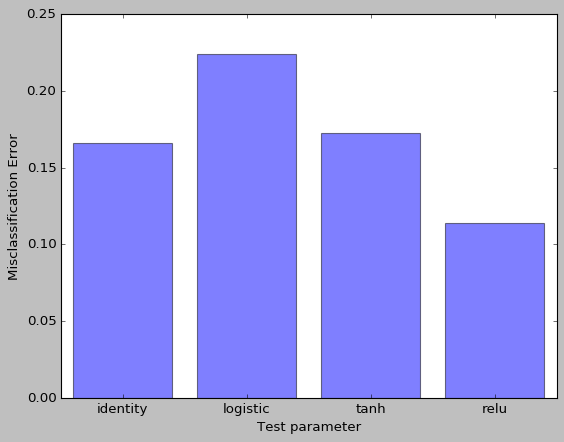

The optimal activation is: relu


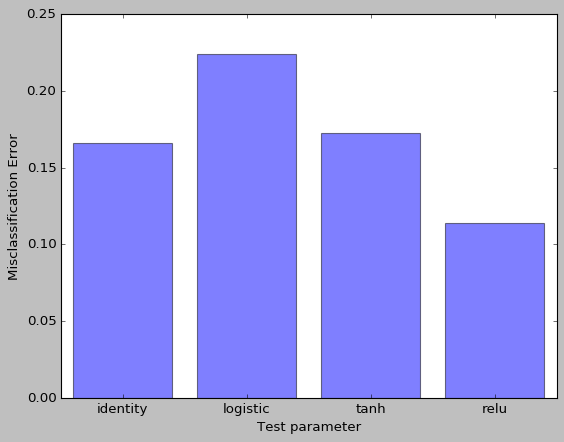

The optimal activation is: relu
Took for activation method with adam solver: 14.3004899025 sec


In [182]:
import time
time1 = time.time()
opt_act_adam= cross_validation_activation(train_PCA, train_labels_resampled, opt_layer_adam,  'adam')
print("Took for activation method with adam solver: %s sec" % (time.time() - time1))

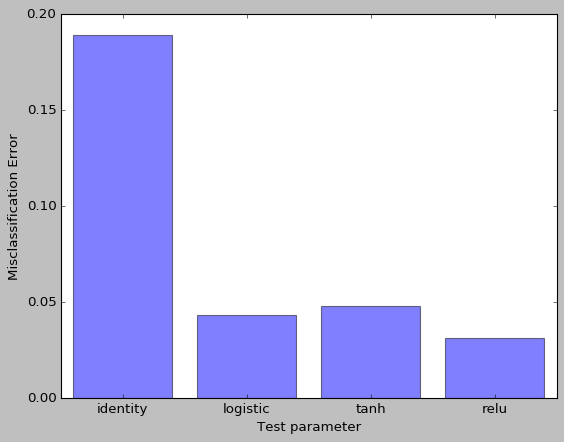

The optimal activation is: relu


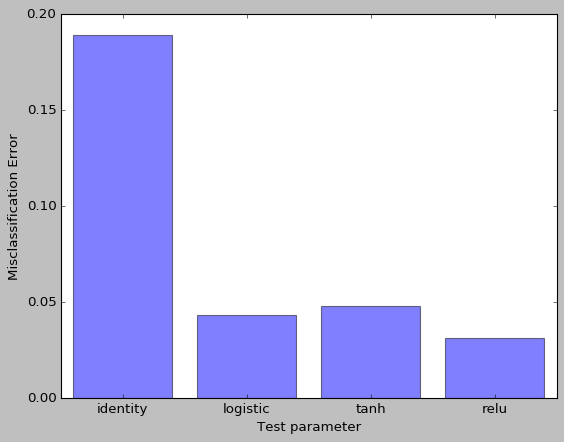

The optimal activation is: relu
Took for activation method with lbfgs solver: 78.3615429401 sec


In [183]:
import time
time1 = time.time()
opt_act_lbfgs= cross_validation_activation(train_PCA, train_labels_resampled, opt_layer_lbfgs,  'lbfgs')
print("Took for activation method with lbfgs solver: %s sec" % (time.time() - time1))

In [189]:
clf = MLPClassifier(activation= opt_act_adam,hidden_layer_sizes=(opt_layer_adam,), solver= 'adam')
clf.fit(train_PCA, train_labels_resampled)
preds = clf.predict(test_PCA)
print report(test_labels, preds, 'Clf for Optimal Activation Method with Solver= adam is:')
print statistics_opt

             precision    recall  f1-score   support

          0       0.50      1.00      0.67         6
          1       1.00      0.82      0.90        33

avg / total       0.92      0.85      0.86        39

Confusion matrix for Clf for Optimal Activation Method with Solver= adam is::
[[0  1]]
[[ 6  0]
 [ 6 27]] 

F1 weighted average: 0.864103 

F1 macro average: 0.783333 

(0.86410256410256414, 0.78333333333333333)
[0.88539425858615806, 0.81195756991321111]


In [208]:
clf = MLPClassifier(activation= opt_act_lbfgs,hidden_layer_sizes=(opt_layer_lbfgs,), solver= 'lbfgs')
clf.fit(train_PCA, train_labels_resampled)
preds = clf.predict(test_PCA)
print report(test_labels, preds, 'Clf for Optimal Activation Method with Solver= lbfgs is: ')
print statistics_opt

             precision    recall  f1-score   support

          0       0.75      1.00      0.86         6
          1       1.00      0.94      0.97        33

avg / total       0.96      0.95      0.95        39

Confusion matrix for Clf for Optimal Activation Method with Solver= lbfgs is: :
[[0  1]]
[[ 6  0]
 [ 2 31]] 

F1 weighted average: 0.951580 

F1 macro average: 0.912946 

(0.95157967032967028, 0.9129464285714286)
[0.88539425858615806, 0.81195756991321111]


Άρα ο lbfgs είναι καλύτερος για τα δεδομένα μας.

In [214]:
opt_layer= opt_layer_lbfgs
opt_act= opt_act_lbfgs

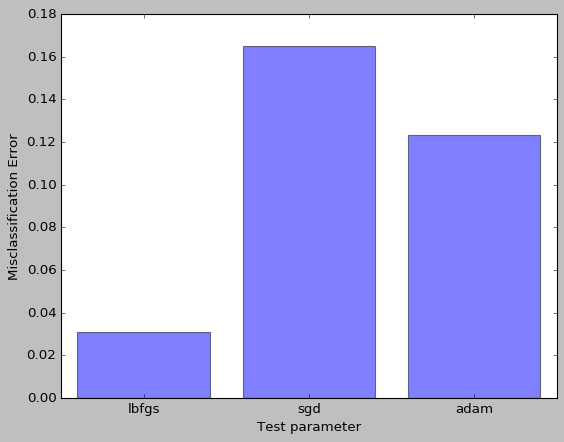

The optimal Solver is: lbfgs


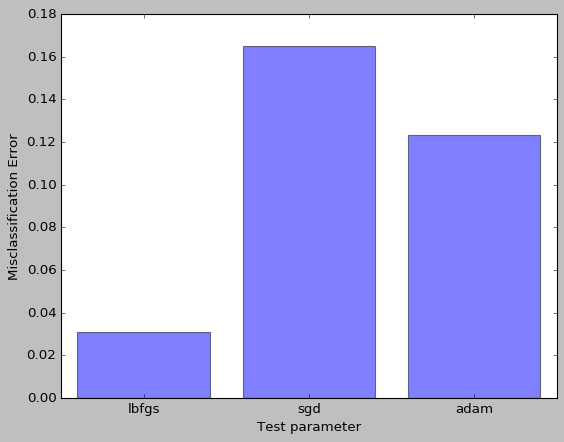

The optimal Solver is: lbfgs
Took for optimal solver: 17.1827011108 sec


In [210]:
time1= time.time()
opt_solver= cross_validation_solver(train_PCA, train_labels_resampled, opt_layer, opt_act)
print("Took for optimal solver: %s sec" % (time.time() - time1))

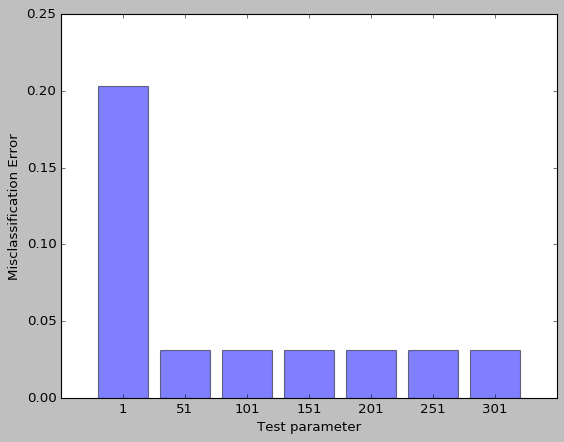

The optimal max_iter is: 51


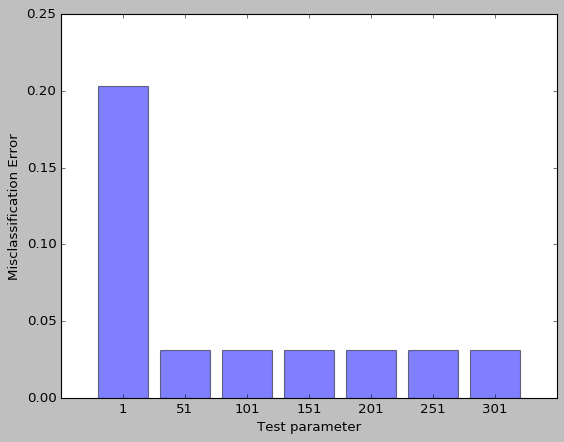

The optimal max_iter is: 51
Took for max_iter: 65.2080378532 sec


In [211]:
time1= time.time()
opt_max_iter= cross_validation_max_iter(train_PCA, train_labels_resampled, opt_layer, opt_act, opt_solver)
print("Took for max_iter: %s sec" % (time.time() - time1))

In [215]:
clf = MLPClassifier(activation= opt_act_lbfgs,hidden_layer_sizes=(opt_layer_lbfgs,), solver= 'lbfgs')
clf.fit(train_PCA, train_labels_resampled)
preds = clf.predict(test_PCA)
print report(test_labels, preds, 'Optimal mx_iter')
print statistics_opt

             precision    recall  f1-score   support

          0       0.71      0.83      0.77         6
          1       0.97      0.94      0.95        33

avg / total       0.93      0.92      0.93        39

Confusion matrix for Optimal mx_iter:
[[0  1]]
[[ 5  1]
 [ 2 31]] 

F1 weighted average: 0.925444 

F1 macro average: 0.861538 

(0.9254437869822485, 0.86153846153846159)
[0.88539425858615806, 0.81195756991321111]


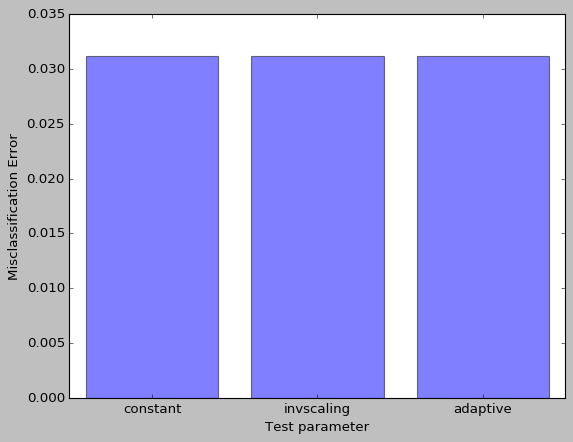

The optimal Learning Rate is: constant


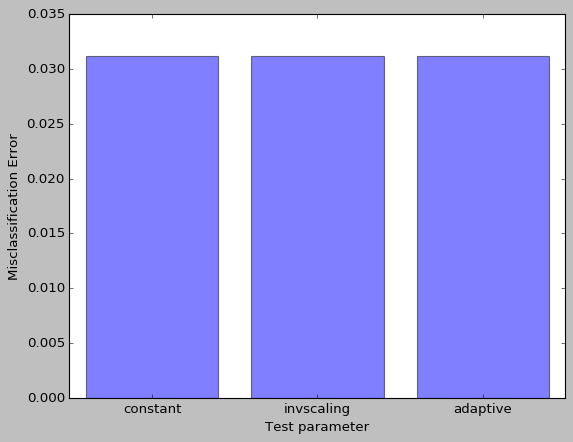

The optimal Learning Rate is: constant
Took for learnign rate: 35.2828660011 sec


In [216]:
time1= time.time()
opt_learning_rate= cross_validation_learning_rate(train_PCA, train_labels_resampled, opt_layer, opt_act,opt_solver,opt_max_iter)
print("Took for learnign rate: %s sec" % (time.time() - time1))

Βλέπουμε ότι για όλες τις διαφορέτικες τιμές learnig rate έχουμε τα ίδια περίπου αποτελέσματα.

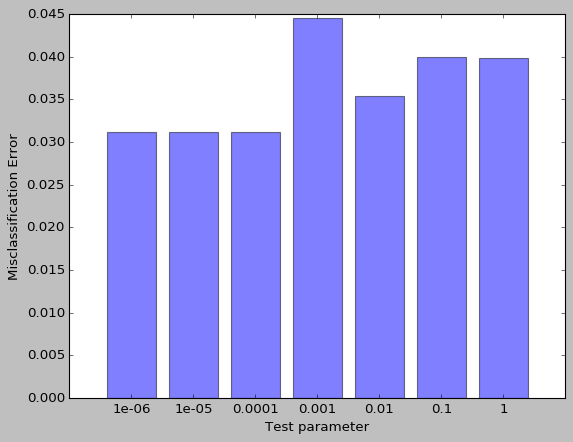

The optimal alpha is: 1e-06


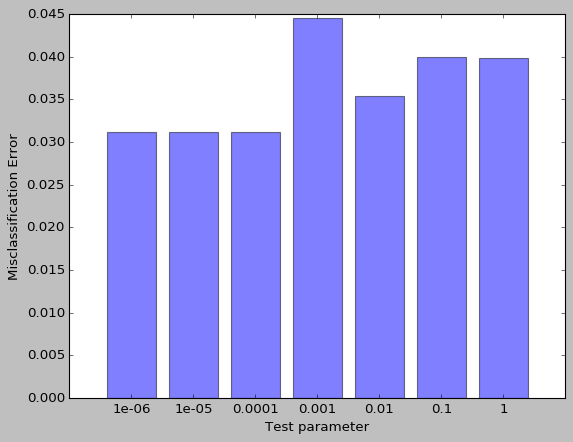

The optimal alpha is: 1e-06
Took for alpha: 178.653898001 sec


In [217]:
time1= time.time()
opt_alpha= cross_validation_alpha(train_PCA, train_labels_resampled, opt_layer, opt_act,opt_solver,opt_max_iter, opt_learning_rate)
print("Took for alpha: %s sec" % (time.time() - time1))

In [233]:
clf = MLPClassifier(solver=opt_solver, 
                    hidden_layer_sizes=(opt_layer,), learning_rate= opt_learning_rate,
                    activation= opt_act)
clf.fit(train_PCA, train_labels_resampled)
preds = clf.predict(test_PCA)
(a,b)= report (test_labels,preds,'Optimal MLP')
print (a,b)
print statistics_opt

             precision    recall  f1-score   support

          0       0.71      0.83      0.77         6
          1       0.97      0.94      0.95        33

avg / total       0.93      0.92      0.93        39

Confusion matrix for Optimal MLP:
[[0  1]]
[[ 5  1]
 [ 2 31]] 

F1 weighted average: 0.925444 

F1 macro average: 0.861538 

(0.9254437869822485, 0.86153846153846159)
[0.88539425858615806, 0.81195756991321111]


[0.9254437869822485, 0.86153846153846159]
[0.88539425858615806, 0.81195756991321111]


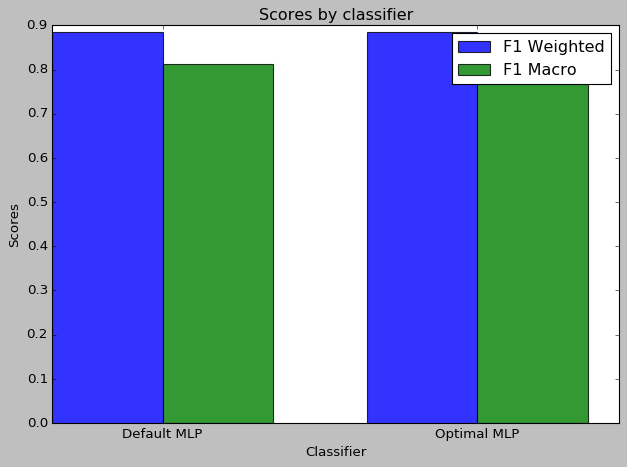

In [235]:
opt_mlp_statistics= [a,b]
print opt_mlp_statistics
print statistics_opt
statistics= statistics_opt +  statistics_opt
x_labels= ['Default MLP', 'Optimal MLP']
graph_bar(statistics,x_labels)

Από τις παραπάνω τιμές και διαγράμματα παρατηρούμε ότι ο Mlp έχει βελτιωθεί αρκετά σε σχέση με τον βέλτιστο έπειτα από τις βέλτιστες τιμές που βρήκαμε. Συγκεκριμένα έχει φτάσει στο 92% επιτυχία απόδοση πάρα πολύ υψηλή. Οι παραπάνω μετρήσεις έγιναν με βάση το βελτιστοποιήμενο dataset. Η πραγματική αύξηση που επιτύχαμε σε όλο το ερώτημα θα μετρηθεί αν συγκρίνουμε το βέλτιστο MLP με είσοδο το επεξεργασμένο dataset και το Mlp με τις default παραμέτρους και με το αρχικό dataset στην είσοδο. Παρακάτω κάνουμε ακριβώς αυτήν την διαδικασία με σκοπό να εξάγουμε τα τελικά μας συμπεράσματα.

[0.9254437869822485, 0.86153846153846159]
[0.73578595317725748, 0.43478260869565216]


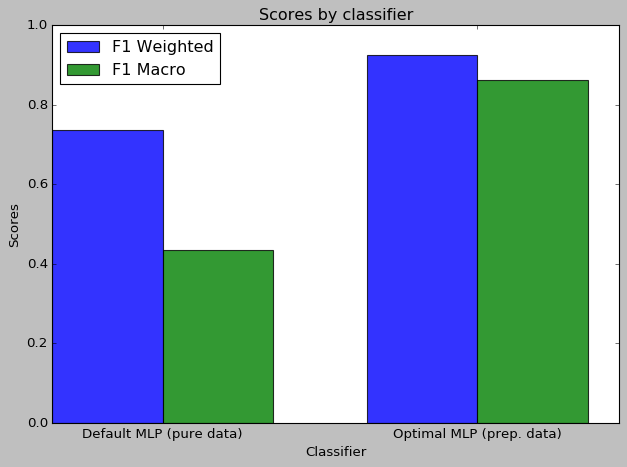

In [236]:
print opt_mlp_statistics
print statistics_def
real_comparison=statistics_def + opt_mlp_statistics
x_labels= ['Default MLP (pure data)', 'Optimal MLP (prep. data)']
graph_bar(real_comparison,x_labels)

Από το τελευταίο διάγραμμα φαίνεται ξεκάθαρα η βελτιστοποίηση που έχουμε κάνει σε όλο το μήκος της εργασίας αυτής. Αρχικά έχουμε τα δεδομένα μας  και κάνουμε μια κατάλληλη προεπεξεργασία σε αυτά, πράγμα που επιφέρει μια αύξηση στην επιτυχία μας. Στην συνέχεια βρίσκουμε και τις βέλτιστες υποπαραμέτους του MLP και τελικά καταφέρνουμε να βελτιώσουμε τα αποτελέσματα μας κατά περίπου **30%** (το ποσοστό αυτό το πήραμε από πολλές εκτελέσεις του κώδικα, διότι οι αριθμοί αυτοί έχουν μια στοχαστικότητα αλλά το κέρδος ήταν περιπου εκεί)!


<center><h2>Τελικά Συμπεράσματα:</center></h2><br>
Συμπερασματικά, η καλύτερη σειρά προεπεξεργασίας του συγκεκριμένου dataset ήταν αρχικά η κατωφλιοποίηση των δειγμάτων με κατώφλι =0,0001 η οποία μας κόβει 5 συνολικά συνιστώσες. Έπειτα έγινε standardization του dataset και στην συνέχεια overSampling διότι από την αρχή είχαμε παρατηρήσει οτι τα δεδομένα μας δεν ήταν ισορροπημένα. Τέλος στο στάδιο αυτό έγινε και εξαγωγή χαρακτηριστικών PCA όπου τελικά κρατήσαμε 9 συνιστώσες. Όπως είχαμε αναφέρει και παραπάνω τόσο η σειρά όσο και οι παράμετροι αυτοί άλλαξαν αρκετές φορές μέχρι να επιτύχουμε τα βέλτιστα αποτελέσματα. Οι Dummies Classificatοr δεν έχουν υπερπαραμέτρους προς βελτιστοποίηση οπότε η βελτιστοποίησή τους αρκείται στην βελτιστοποίηση του dataset. 